# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [108]:
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv',sep='\t')
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto Beans, Guacamole, Lettuce]]",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettuce]]",$8.75


### Step 4. See the first 10 entries

In [109]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sour Cream, Guacamole, Lettuce]]",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables, Black Beans, Pinto Beans, Cheese, Sour Cream, Guacamole, Lettuce]]",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Cheese, Sour Cream, Lettuce]]",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto Beans, Cheese, Sour Cream, Lettuce]]",$9.25


In [110]:
#the most expensive item name
#The result in the last plot
lambdatotype = lambda x:  float(x[1:-1]) #to take away $ sign
chipo['item_price'] = chipo['item_price'].apply(lambdatotype)

chipo.groupby('item_name')['item_price'].max().sort_values(ascending = False).head(10)

item_name
Chips and Fresh Tomato Salsa    44.25
Carnitas Bowl                   35.25
Chicken Burrito                 35.00
Veggie Burrito                  33.75
Chicken Bowl                    32.94
Steak Burrito                   27.75
Steak Bowl                      26.07
Steak Salad Bowl                23.78
Chicken Salad Bowl              22.50
Bowl                            22.20
Name: item_price, dtype: float64

In [124]:
#research of the most expensive item_name and order
res = chipo[chipo['item_name'] == 'Chips and Fresh Tomato Salsa']
res.groupby('item_price').count()

,order_id,quantity,item_name,choice_description
item_price,,,,
2.29,3,3,3,0
2.39,36,36,36,0
2.95,66,66,66,0
5.90,3,3,3,0
11.80,1,1,1,0
44.25,1,1,1,0


### Step 5. Create a histogram of the top 5 items bought

<Axes: xlabel='Item name', ylabel='Amount'>

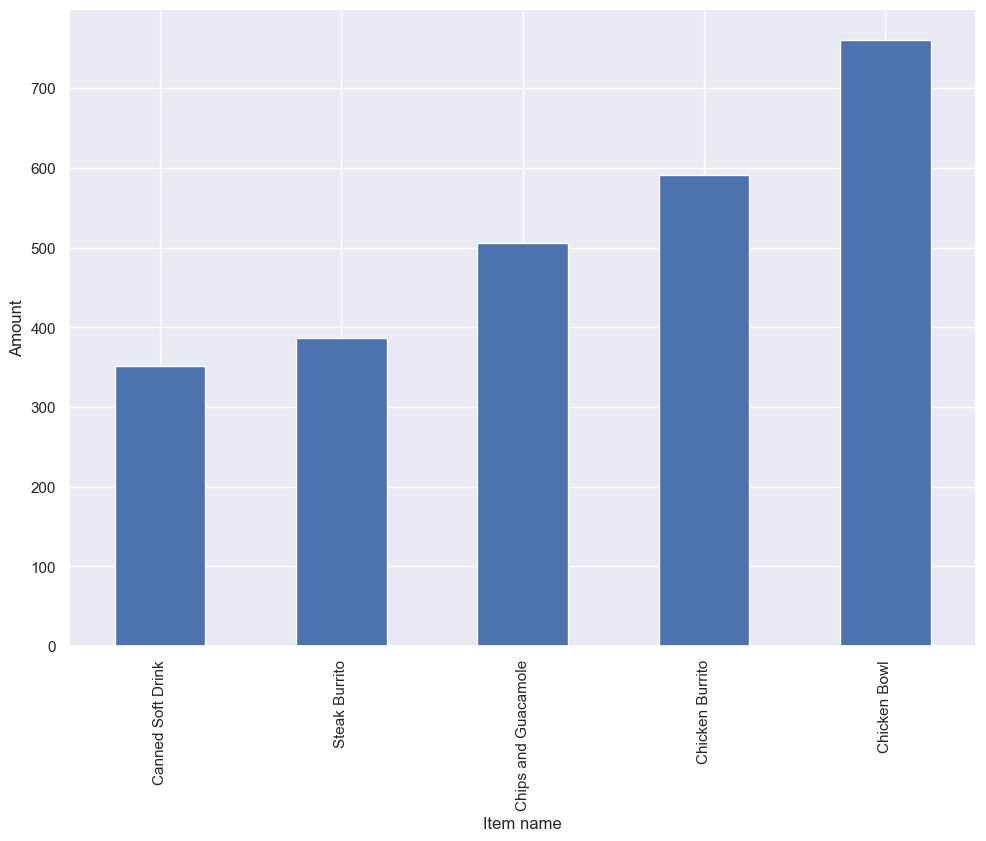

In [111]:
#My decision:
goal = chipo.groupby('item_name')['quantity'].sum().sort_values(ascending = False).head(5)
goal = goal.sort_values(ascending = True)
goal.plot(kind='bar', xlabel="Item name", ylabel="Amount")

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

C:\Users\admin\AppData\Local\Temp\ipykernel_15304\3806470311.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  orders = chipo.groupby('order_id').sum()


<Axes: xlabel='item_price', ylabel='quantity'>

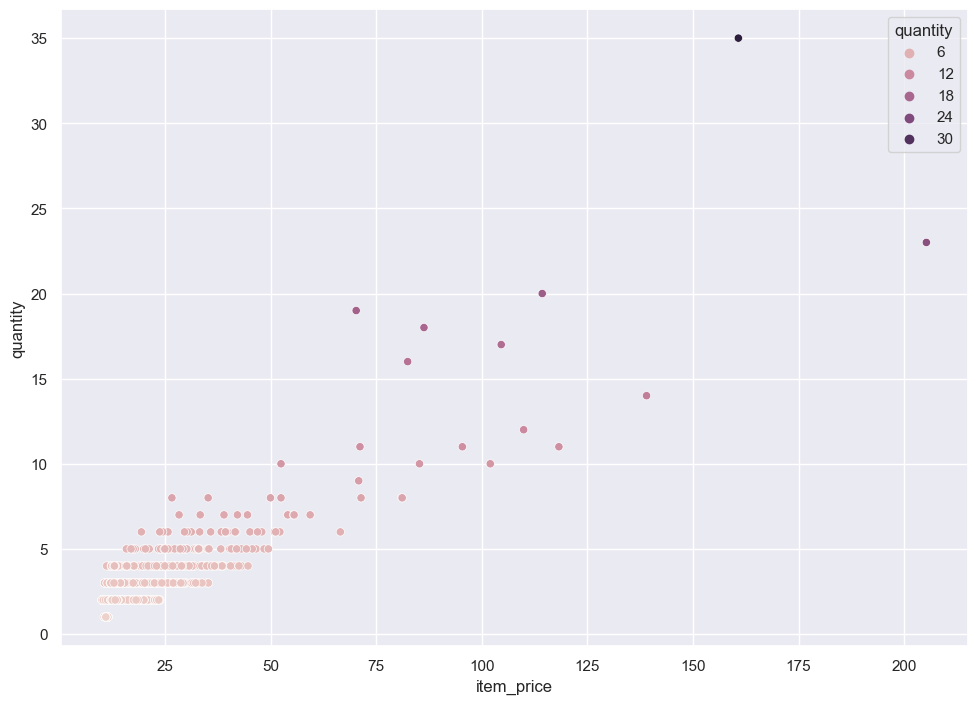

In [112]:
orders = chipo.groupby('order_id').sum()
orders
sns.scatterplot(data=orders, x="item_price", y="quantity", hue="quantity")

In [113]:
goal

item_name
Canned Soft Drink      351
Steak Burrito          386
Chips and Guacamole    506
Chicken Burrito        591
Chicken Bowl           761
Name: quantity, dtype: int64

### Step 7. BONUS: Create a question and a graph to answer your own question.

<Axes: xlabel='item_price', ylabel='item_name'>

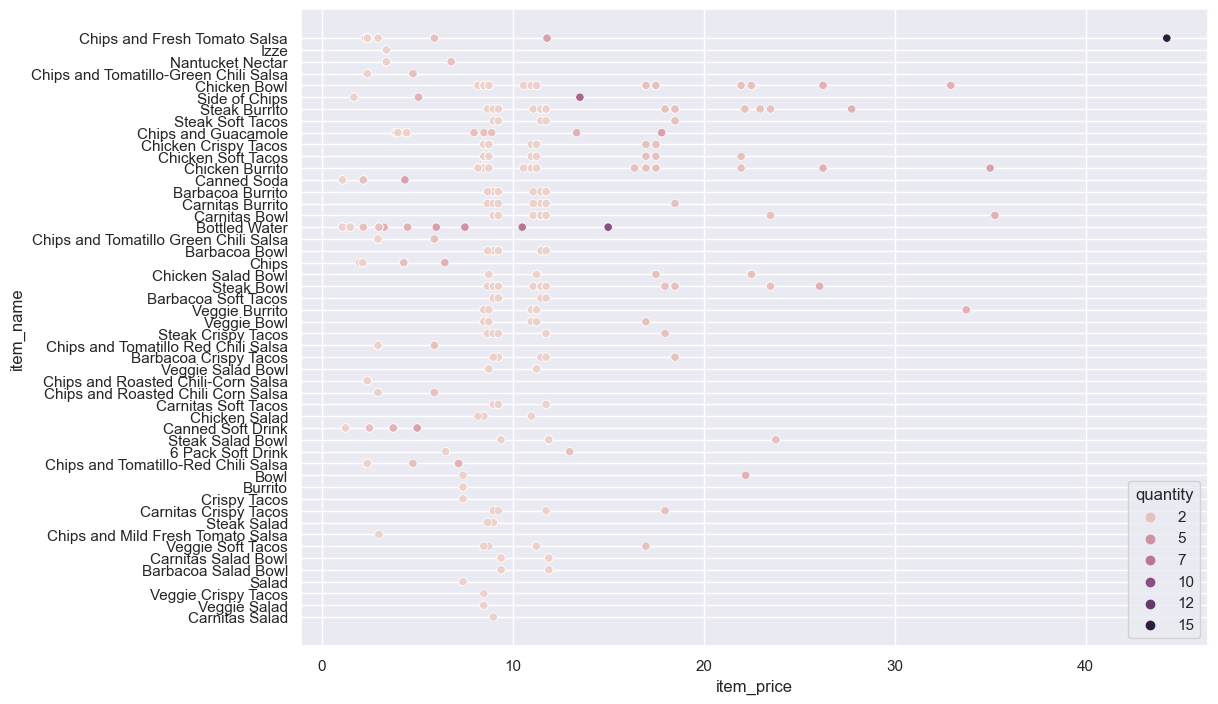

In [114]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data=chipo, x="item_price", y="item_name", hue="quantity")